<h1>I. Import library and dataset 

In [236]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from scipy.stats import uniform

warnings.filterwarnings('ignore')

os.environ['LIGHTGBM_VERBOSITY'] = '1'

pd.set_option('display.max_columns', None)

In [237]:
data_numeric = pd.read_csv(r"C:\Users\PC\Downloads\statlog+german+credit+data\german.data-numeric", delim_whitespace=True, header=None)

In [238]:
data_numeric

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2


In [239]:
data_numeric.duplicated().sum()

0

In [240]:
data_numeric.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,2.675000,1.407000,1.155000,1.404000,1.037000,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,0.705601,0.577654,0.362086,0.490943,0.188856,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


In [241]:
data_numeric[11].unique()

array([2, 1, 3, 4], dtype=int64)

In [242]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
 1   1       1000 non-null   int64
 2   2       1000 non-null   int64
 3   3       1000 non-null   int64
 4   4       1000 non-null   int64
 5   5       1000 non-null   int64
 6   6       1000 non-null   int64
 7   7       1000 non-null   int64
 8   8       1000 non-null   int64
 9   9       1000 non-null   int64
 10  10      1000 non-null   int64
 11  11      1000 non-null   int64
 12  12      1000 non-null   int64
 13  13      1000 non-null   int64
 14  14      1000 non-null   int64
 15  15      1000 non-null   int64
 16  16      1000 non-null   int64
 17  17      1000 non-null   int64
 18  18      1000 non-null   int64
 19  19      1000 non-null   int64
 20  20      1000 non-null   int64
 21  21      1000 non-null   int64
 22  22      1000 non-null   int64
 23  23      1000 n

This dataset is clean, with all non-null values, no duplicated, correct data types, and no invalid data.

<h1>II. EDA

<h1>1. Outlier

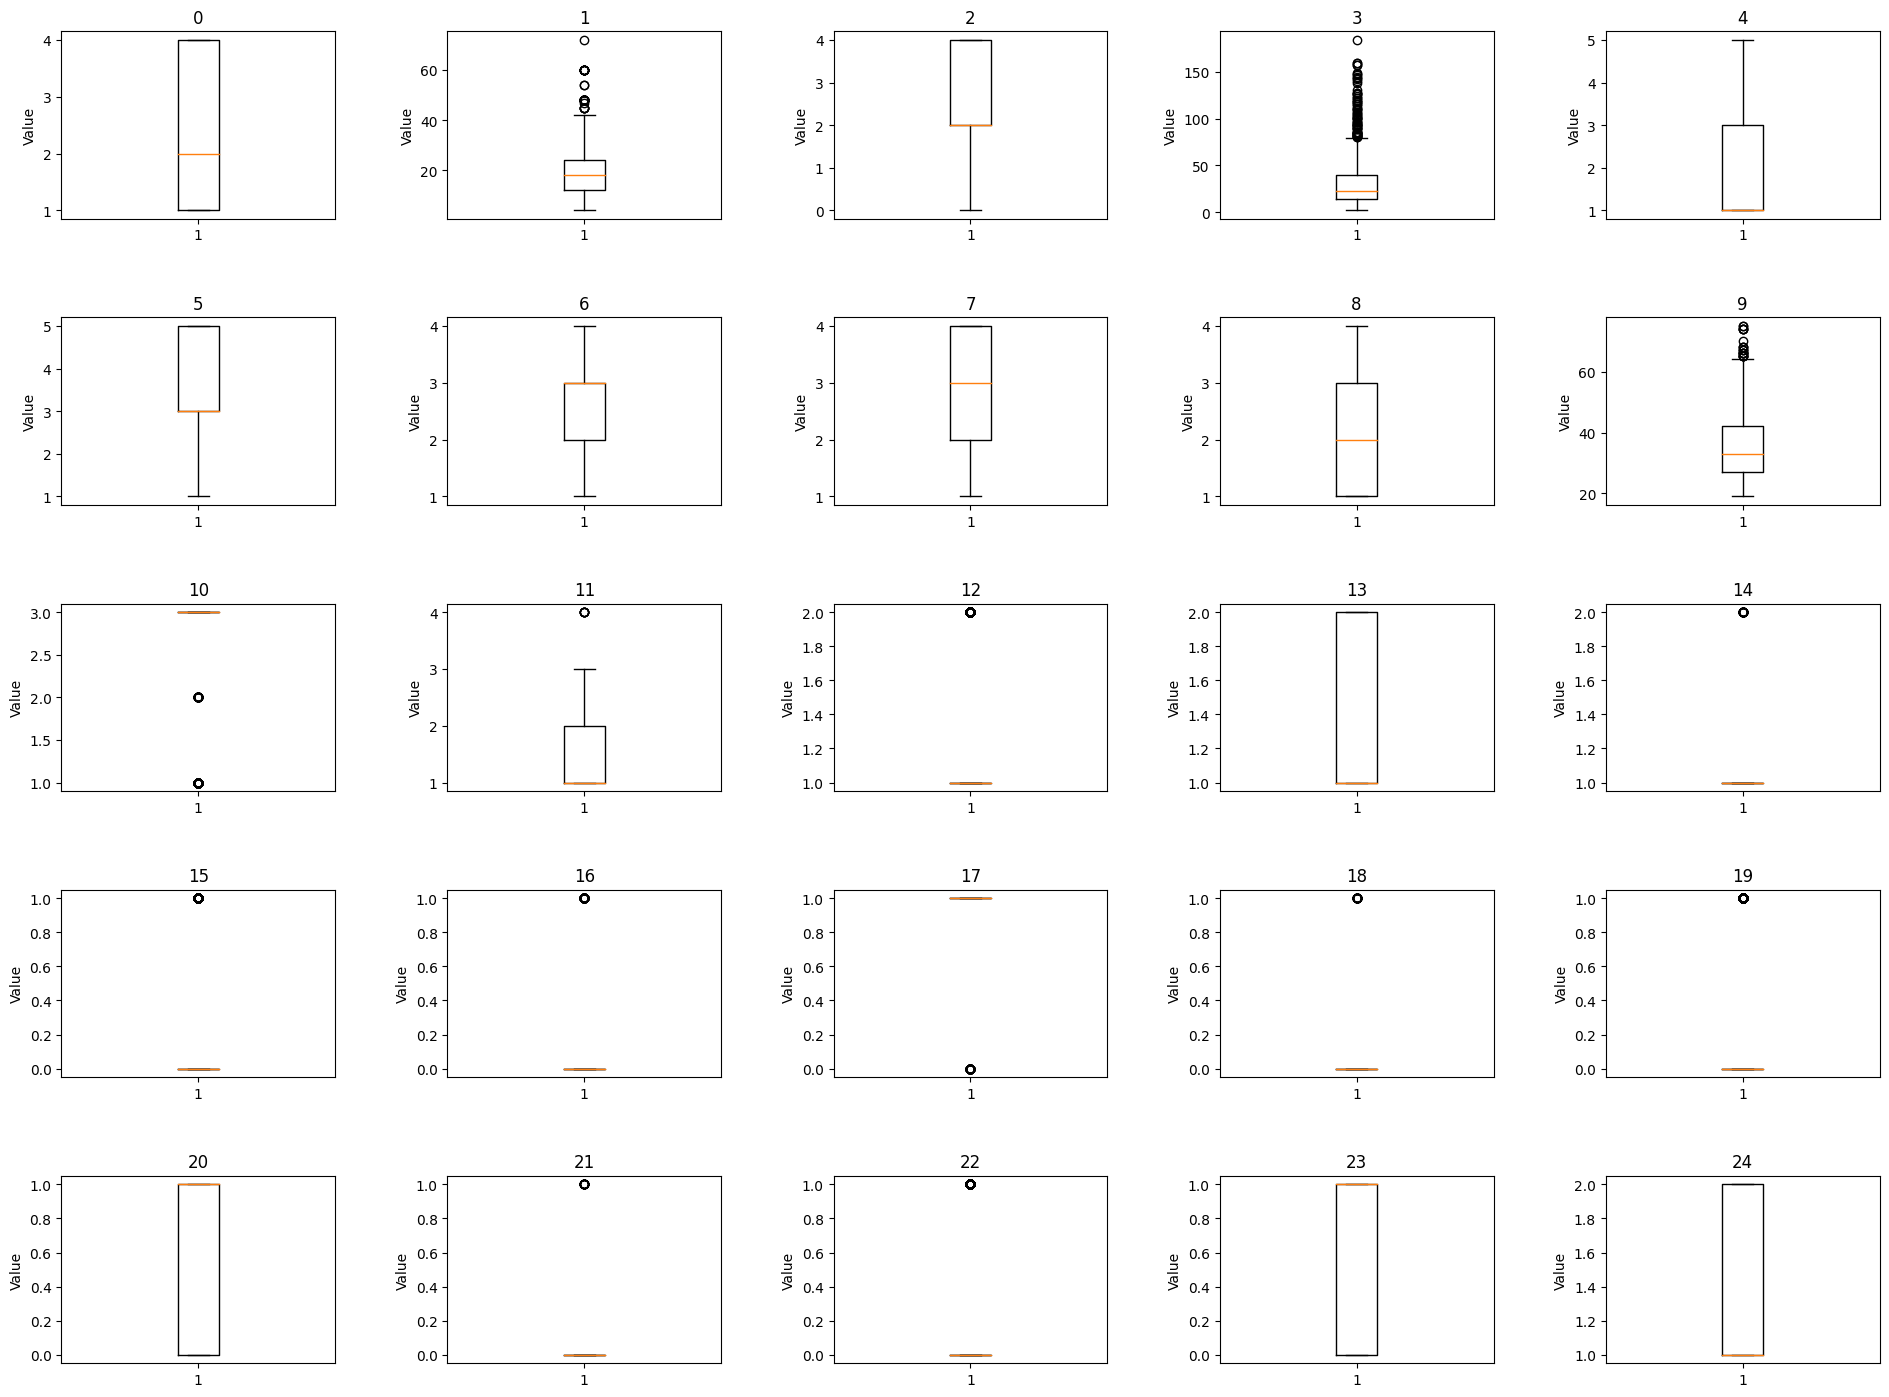

In [243]:
fig, axes = plt.subplots(5, 5, figsize=(20, 15)) 
fig.tight_layout(pad=5.0)

for i, ax in enumerate(axes.flatten()):
    feature_name = data_numeric.columns[i]
    ax.boxplot(data_numeric[feature_name])
    ax.set_title(feature_name)
    ax.set_ylabel('Value')

plt.show()

Besides the features with outliers that are simply due to their categorical nature and not actual anomalies, the original numerical features with outliers (1, 3, 9, ...) will be retained and not dropped, as removing them might lead to missing potential fraud data.

<h2>2. Data imbalance check 

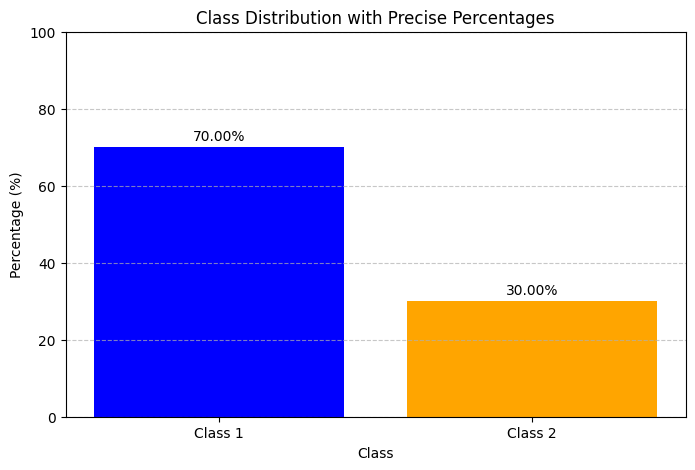

In [244]:
percent_1 = len(data_numeric[data_numeric[24] == 1]) / len(data_numeric) * 100 
percent_2 = len(data_numeric[data_numeric[24] == 2]) / len(data_numeric) * 100 

precise_values = [percent_1, percent_2]

plt.figure(figsize=(8, 5))
bars = plt.bar(['Class 1', 'Class 2'], precise_values, color=['blue', 'orange'])

for bar, value in zip(bars, precise_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, 
             f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution with Precise Percentages')
plt.ylabel('Percentage (%)')
plt.xlabel('Class')
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It is not extreme imbalance, but resampling could be apply to see wether the model predict properly.

<h1>III. Methodology

<h2>1. Metrics

In the case of credit card fraud detection, minimizing false negatives is crucial. Fraudulent transactions can result in significant financial losses, making it essential to implement measures to prevent them. A false negative occurs when a fraudulent transaction is mistakenly classified as genuine, which can have severe consequences ([credit: SMOTE and Tomek Links for imbalanced data Kaggle notebook](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data#4.2-Optimising-for-Recall)).

However, there are two primary challenges when optimizing for recall in this scenario. First, it can lead to increased costs by misclassifying legitimate transactions from potential customers as fraudulent. Second, in my experience, optimizing recall really high (eg. 1) often degrades other metrics, such as precision, resulting in an imbalanced and less effective model.

To address these issues, the F1 score is selected as the primary metric. The F1 score, being the harmonic mean of recall and precision, balances the trade-off between the two. While recall remains an important secondary criterion, prioritizing the F1 score ensures the model achieves a better equilibrium. This approach helps to identify fraudulent transactions effectively while keeping the false positive rate manageable, maintaining both cost-effectiveness and robust fraud detection.

<h2>2. Resampling 

Four techniques are used to address class imbalance: using the class_weight='balanced' parameter and three resampling techniques, including SMOTE, Tomek Links, and a combination of both. However, the class imbalance ratio of 7:3 is not too extreme, and some models can handle imbalanced classes effectively without resampling (eg. Tree-based models). Therefore, these techniques will be tested, and only those that improve performance will be utilized.

<h2>3. Scaling 

Similar to resampling, scaling will be applied only when required by the model (e.g., SVM and Logistic Regression).

<h2>4. Feature selection 

- Similar to resampling and scaling, feature selection will be applied only if it improves the model's performance.
- RFE will be used as the primary feature selection technique.

<h1>III. Model 

Split train and test set 

In [245]:
data_numeric.rename(columns={24: "target"}, inplace=True)
X = data_numeric.drop(columns="target")
y = data_numeric["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross validation 

In [246]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)

<h2>1. Logistic regression 

In Logistic regression, The target must be mapped to 0 and 1 since the sigmoid function outputs probabilities that can be thresholded to decide between the two classes.

In [247]:
y_train_bi = y_train.map({1: 0, 2: 1})
y_test_bi = y_test.map({1: 0, 2: 1})
y_train_bi = np.array(y_train_bi)
y_test_bi = np.array(y_test_bi)

<h3>1.1 Baseline model

In [248]:
model = LogisticRegression(random_state=42)

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train_bi,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1 
)

f1_mean = cv_results['test_f1'].mean()
recall_mean = cv_results['test_recall'].mean()
precision_mean = cv_results['test_precision'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (CV Mean): {f1_mean:.4f}")
print(f"Recall (CV Mean): {recall_mean:.4f}")
print(f"Precision (CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (CV Mean): 0.5313
Recall (CV Mean): 0.4525
Precision (CV Mean): 0.6457
Accuracy (CV Mean): 0.7613


<h3> 1.2. Oversampling 

In [249]:
model = LogisticRegression(random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression(random_state=42))  
])

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train_bi,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1  
)

f1_mean = cv_results['test_f1'].mean()
recall_mean = cv_results['test_recall'].mean()
precision_mean = cv_results['test_precision'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (CV Mean): {f1_mean:.4f}")
print(f"Recall (CV Mean): {recall_mean:.4f}")
print(f"Precision (CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (CV Mean): 0.5748
Recall (CV Mean): 0.5855
Precision (CV Mean): 0.5661
Accuracy (CV Mean): 0.7412


<h3>1.3. Undersampling 

In [250]:
model = LogisticRegression(random_state=42)

pipeline = Pipeline([
    ('tomek', TomekLinks()),  
    ('scaler', StandardScaler()),  
    ('model', LogisticRegression(random_state=42))  
])

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train_bi,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1  
)

f1_mean = cv_results['test_f1'].mean()
recall_mean = cv_results['test_recall'].mean()
precision_mean = cv_results['test_precision'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (CV Mean): {f1_mean:.4f}")
print(f"Recall (CV Mean): {recall_mean:.4f}")
print(f"Precision (CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (CV Mean): 0.5743
Recall (CV Mean): 0.5440
Precision (CV Mean): 0.6129
Accuracy (CV Mean): 0.7600


<h3> 1.4. Combining oversampling and undersampling

In [251]:
model = LogisticRegression(random_state=42)

pipeline = Pipeline([
    ('smote_tomek', SMOTETomek(random_state=42)),
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression(random_state=42))
])

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train_bi,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1 
)

f1_mean = cv_results['test_f1'].mean()
recall_mean = cv_results['test_recall'].mean()
precision_mean = cv_results['test_precision'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (CV Mean): {f1_mean:.4f}")
print(f"Recall (CV Mean): {recall_mean:.4f}")
print(f"Precision (CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (CV Mean): 0.5628
Recall (CV Mean): 0.5646
Precision (CV Mean): 0.5619
Accuracy (CV Mean): 0.7375


<h3>1.6. Class weight = 'balanced'

In [252]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, class_weight='balanced'))
])

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train_bi,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1
)

f1_mean = cv_results['test_f1'].mean()
recall_mean = cv_results['test_recall'].mean()
precision_mean = cv_results['test_precision'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (CV Mean): {f1_mean:.4f}")
print(f"Recall (CV Mean): {recall_mean:.4f}")
print(f"Precision (CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (CV Mean): 0.6060
Recall (CV Mean): 0.7099
Precision (CV Mean): 0.5308
Accuracy (CV Mean): 0.7238


With a class ratio that is not extreme (7:3), the baseline model combined with class_weight='balanced' delivers better results compared to resampling methods. This result will be used as a foundation for further optimization to achieve the best possible performance.

<h3> 1.5. Feature selection 

In [253]:
results = []

for n_features in range(1, X_train.shape[1] + 1): 
    pipeline = Pipeline([ 
        ('scaler', StandardScaler()),
         
        ('rfe', RFE(estimator=LogisticRegression(random_state=42, class_weight='balanced'), n_features_to_select=n_features)),  
        ('model', LogisticRegression(random_state=42, class_weight='balanced'))  
    ])
    
    cv_results = cross_validate(
        estimator=pipeline,
        X=X_train,  
        y=y_train_bi,
        scoring=scoring,
        cv=cv,
        return_train_score=False,
        n_jobs=-1
    )
    
    f1_mean = cv_results['test_f1'].mean()
    recall_mean = cv_results['test_recall'].mean()
    precision_mean = cv_results['test_precision'].mean()
    accuracy_mean = cv_results['test_accuracy'].mean()
    
    results.append({
        'n_features': n_features,
        'f1_mean': f1_mean,
        'recall_mean': recall_mean,
        'precision_mean': precision_mean,
        'accuracy_mean': accuracy_mean
    })

results_df = pd.DataFrame(results)
print(results_df)

    n_features   f1_mean  recall_mean  precision_mean  accuracy_mean
0            1  0.562323     0.780272        0.440031        0.63375
1            2  0.558078     0.713946        0.459287        0.66000
2            3  0.567645     0.722364        0.469147        0.66875
3            4  0.550819     0.689286        0.460698        0.66250
4            5  0.544292     0.676701        0.457464        0.66375
5            6  0.556079     0.693537        0.465858        0.67000
6            7  0.563832     0.685119        0.479663        0.68125
7            8  0.565201     0.689371        0.481636        0.68250
8            9  0.567117     0.680952        0.488228        0.68875
9           10  0.572335     0.676616        0.497464        0.69625
10          11  0.573318     0.676786        0.498923        0.69750
11          12  0.585366     0.689201        0.510253        0.70750
12          13  0.588447     0.697619        0.511039        0.70875
13          14  0.590687     0.693

The optimal number of features for the model is 24.

In [254]:
scoring = ['f1', 'recall', 'precision', 'accuracy']

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rfe', RFE(estimator=LogisticRegression(random_state=42, class_weight='balanced'), n_features_to_select=23)),  
    ('model', LogisticRegression(random_state=42, class_weight='balanced'))  
])

cv_results = cross_validate(
    pipeline,
    X=X_train,  
    y=y_train_bi,
    scoring=scoring,
    cv=cv, 
    return_train_score=False,
    n_jobs=-1
)

f1_mean = cv_results['test_f1'].mean()
recall_mean = cv_results['test_recall'].mean()
precision_mean = cv_results['test_precision'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Mean Cross-Validated Scores:")
print(f"F1 Score (Mean): {f1_mean:.4f}")
print(f"Recall (Mean): {recall_mean:.4f}")
print(f"Precision (Mean): {precision_mean:.4f}")
print(f"Accuracy (Mean): {accuracy_mean:.4f}")


Mean Cross-Validated Scores:
F1 Score (Mean): 0.6070
Recall (Mean): 0.7099
Precision (Mean): 0.5323
Accuracy (Mean): 0.7250


<h3> 1.6. Hyperparameter tuning 

In [255]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [256]:
model = LogisticRegression(random_state=42, class_weight='balanced')

n_features_to_select = 23

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=model, n_features_to_select=n_features_to_select)),
    ('model', model)
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  
    'model__solver': ['liblinear', 'lbfgs']  
}

scoring = {
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1,  
    verbose=2    
)

grid_search.fit(X_train, y_train_bi)

best_params = grid_search.best_params_
best_f1_cv = grid_search.best_score_
best_pipeline = grid_search.best_estimator_

mean_recall_cv = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
mean_precision_cv = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]
mean_accuracy_cv = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]

y_pred_test = best_pipeline.predict(X_test)  

test_f1 = f1_score(y_test_bi, y_pred_test)
test_recall = recall_score(y_test_bi, y_pred_test)
test_precision = precision_score(y_test_bi, y_pred_test)
test_accuracy = accuracy_score(y_test_bi, y_pred_test)

print(f"\nBest Parameters: {best_params}")
print(f"Mean CV F1-Score: {best_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

print("\nTest Set Metrics:")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits



Best Parameters: {'model__C': 0.01, 'model__solver': 'lbfgs'}
Mean CV F1-Score: 0.6171
Mean CV Recall: 0.7305
Mean CV Precision: 0.5352
Mean CV Accuracy: 0.7275

Test Set Metrics:
Test F1-Score: 0.6197
Test Recall: 0.7458
Test Precision: 0.5301
Test Accuracy: 0.7300


After tuning, this is the best performance the model has achieved.

<h2>2. Decision Tree 

<h3>2.1 Baseline model

In [257]:
model = DecisionTreeClassifier(random_state=42)

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1  
)

mean_f1 = np.mean(cv_results['test_f1'])
mean_recall = np.mean(cv_results['test_recall'])
mean_precision = np.mean(cv_results['test_precision'])
mean_accuracy = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1:.4f}")
print(f"Mean CV Recall: {mean_recall:.4f}")
print(f"Mean CV Precision: {mean_precision:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy:.4f}")

Mean CV F1-Score: 0.7711
Mean CV Recall: 0.7585
Mean CV Precision: 0.7849
Mean CV Accuracy: 0.6850


<h3>2.2. Class weight = 'balanced'

Resampling is not strictly necessary for tree-based models, and through experimentation with various resampling techniques, it has been shown that these methods do not improve performance. Additionally, since the class imbalance is not severe, using class_weight='balanced' is sufficient.

In [258]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1  
)

mean_f1 = np.mean(cv_results['test_f1'])
mean_recall = np.mean(cv_results['test_recall'])
mean_precision = np.mean(cv_results['test_precision'])
mean_accuracy = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1:.4f}")
print(f"Mean CV Recall: {mean_recall:.4f}")
print(f"Mean CV Precision: {mean_precision:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy:.4f}")

Mean CV F1-Score: 0.7839
Mean CV Recall: 0.8015
Mean CV Precision: 0.7678
Mean CV Accuracy: 0.6912


<h3>2.3. Feature selection

Tree-based models generally do not require feature selection as a strict prerequisite, but it improves performance in this case, so it is still applied.

In [259]:
base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

n_features = X_train.shape[1]

results = []

for i in range(1, n_features + 1):  
    rfe = RFE(estimator=base_model, n_features_to_select=i)
    
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    cv_results = cross_validate(
        estimator=base_model,
        X=X_train_rfe,
        y=y_train,
        scoring=scoring,  
        cv=cv,           
        return_train_score=False,
        n_jobs=-1
    )
    
    mean_f1 = np.mean(cv_results['test_f1'])
    mean_recall = np.mean(cv_results['test_recall'])
    mean_precision = np.mean(cv_results['test_precision'])
    mean_accuracy = np.mean(cv_results['test_accuracy'])

    results.append({
        'n_features': i,
        'mean_f1': mean_f1,
        'mean_recall': mean_recall,
        'mean_precision': mean_precision,
        'mean_accuracy': mean_accuracy
    })

rfe_results = pd.DataFrame(results)

In [260]:
rfe_results

,n_features,mean_f1,mean_recall,mean_precision,mean_accuracy
0,1,0.603765,0.538514,0.688576,0.50750
1,2,0.702614,0.685167,0.721643,0.59500
2,3,0.713946,0.701351,0.729319,0.60875
3,4,0.748485,0.758575,0.739603,0.64500
4,5,0.747730,0.753169,0.743180,0.64500
5,6,0.754517,0.762001,0.747549,0.65375
6,7,0.757920,0.771059,0.745468,0.65625
7,8,0.772751,0.781789,0.764298,0.67875
8,9,0.773346,0.785264,0.762273,0.67875
9,10,0.768775,0.781757,0.756480,0.67125


The optimal number of features for the model is 18.

In [261]:
base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

rfe = RFE(estimator=base_model, n_features_to_select=18)

X_train_rfe = rfe.fit_transform(X_train, y_train)

cv_results = cross_validate(
    estimator=base_model,
    X=X_train_rfe,
    y=y_train,
    scoring=scoring, 
    cv=cv,           
    return_train_score=False,
    n_jobs=-1
)

base_model.fit(X_train_rfe, y_train)

mean_f1 = np.mean(cv_results['test_f1'])
mean_recall = np.mean(cv_results['test_recall'])
mean_precision = np.mean(cv_results['test_precision'])
mean_accuracy = np.mean(cv_results['test_accuracy'])

X_test_rfe = rfe.transform(X_test)

y_pred_test = base_model.predict(X_test_rfe)

test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Mean CV F1-Score: {mean_f1:.4f}")
print(f"Mean CV Recall: {mean_recall:.4f}")
print(f"Mean CV Precision: {mean_precision:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy:.4f}")

print("\nTest Set Metrics:")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Mean CV F1-Score: 0.7921
Mean CV Recall: 0.8050
Mean CV Precision: 0.7801
Mean CV Accuracy: 0.7050

Test Set Metrics:
Test F1-Score: 0.7944
Test Recall: 0.8085
Test Precision: 0.7808
Test Accuracy: 0.7050


<h3>2.4. Hyperparameter tuning 

In [262]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'model__max_depth': [10, 20, 30, None], 
    'model__min_samples_split': [2, 20, 50, 100, 200],  
    'model__min_samples_leaf': [1, 5, 10, 20, 50], 
    'model__max_features': [None, 'sqrt', 'log2', 0.3, 0.5, 0.7]  
}

n_features_to_select = 18

pipeline = Pipeline([
    ('rfe', RFE(estimator=model, n_features_to_select=n_features_to_select)),
    ('model', model)
])

scoring = {
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1,  
    verbose=2    
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_f1_cv = grid_search.best_score_
best_pipeline = grid_search.best_estimator_

mean_recall_cv = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
mean_precision_cv = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]
mean_accuracy_cv = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]

y_pred_test = best_pipeline.predict(X_test) 
y_proba_test = best_pipeline.predict_proba(X_test)[:, 1]  

test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

print(f"\nBest Parameters: {best_params}")
print(f"Mean CV F1-Score: {best_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Fitting 5 folds for each of 600 candidates, totalling 3000 fits

Best Parameters: {'model__max_depth': 30, 'model__max_features': 0.7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Mean CV F1-Score: 0.7850
Mean CV Recall: 0.7979
Mean CV Precision: 0.7733
Mean CV Accuracy: 0.6950


The model based on feature selection and class_weight='balanced' delivers the best performance.

<h2>3. Random forest 

<h3>3.1. Baseline model

In [263]:
model = RandomForestClassifier(random_state=42)

coring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1 
)

mean_f1 = np.mean(cv_results['test_f1'])
mean_recall = np.mean(cv_results['test_recall'])
mean_precision = np.mean(cv_results['test_precision'])
mean_accuracy = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1:.4f}")
print(f"Mean CV Recall: {mean_recall:.4f}")
print(f"Mean CV Precision: {mean_precision:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy:.4f}")

Mean CV F1-Score: 0.8441
Mean CV Recall: 0.9249
Mean CV Precision: 0.7766
Mean CV Accuracy: 0.7612


<h3>3.2. Class weight = 'balanced'

Similar to the decision tree model above, we will only apply class_weight='balanced'

In [264]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

coring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1 
)

mean_f1 = np.mean(cv_results['test_f1'])
mean_recall = np.mean(cv_results['test_recall'])
mean_precision = np.mean(cv_results['test_precision'])
mean_accuracy = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1:.4f}")
print(f"Mean CV Recall: {mean_recall:.4f}")
print(f"Mean CV Precision: {mean_precision:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy:.4f}")

Mean CV F1-Score: 0.8368
Mean CV Recall: 0.9267
Mean CV Precision: 0.7629
Mean CV Accuracy: 0.7475


<h3> 3.2. Feature selection (optional)

- Similar to the decision tree model above, random forest generally does not require feature selection as a strict prerequisite; however, it improves performance in this case, so it is still applied. 
- The results of using class_weight='balanced' and not using it show no significant difference. However, to optimize the F1 score, the baseline model will be used as the foundation for further optimization.

In [265]:
results = []

for n_features in range(1, X_train.shape[1] + 1):
    pipeline = Pipeline([
        ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=n_features)),  
        ('model', RandomForestClassifier(random_state=42))  
    ])

    cv_results = cross_validate(
        estimator=pipeline,
        X=X_train,  
        y=y_train,
        scoring=scoring,
        cv=cv,
        return_train_score=False,
        n_jobs=-1
    )

    f1_mean = cv_results['test_f1'].mean()
    recall_mean = cv_results['test_recall'].mean()
    precision_mean = cv_results['test_precision'].mean()
    accuracy_mean = cv_results['test_accuracy'].mean()

    results.append({
        'n_features': n_features,
        'f1_mean': f1_mean,
        'recall_mean': recall_mean,
        'precision_mean': precision_mean,
        'accuracy_mean': accuracy_mean
    })

results_df = pd.DataFrame(results)
print(results_df)


    n_features   f1_mean  recall_mean  precision_mean  accuracy_mean
0            1  0.793570     0.896284        0.712519        0.67500
1            2  0.758824     0.797893        0.724209        0.64625
2            3  0.786033     0.842551        0.736884        0.68000
3            4  0.800061     0.838996        0.765111        0.70750
4            5  0.820437     0.862210        0.783949        0.73625
5            6  0.821593     0.860473        0.786504        0.73875
6            7  0.821477     0.869337        0.778712        0.73625
7            8  0.836808     0.894450        0.786241        0.75625
8            9  0.834473     0.892632        0.783697        0.75250
9           10  0.842234     0.912291        0.782343        0.76125
10          11  0.834238     0.894466        0.781986        0.75125
11          12  0.833759     0.901625        0.775536        0.74875
12          13  0.837829     0.905180        0.779885        0.75500
13          14  0.840062     0.906

The optimal number of features for the model is 19.

<h3> 3.3 Hyperparameter tuning 

In [266]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

model = RandomForestClassifier(random_state=42)

n_features_to_select = 19

pipeline = Pipeline([
    ('rfe', RFE(estimator=model, n_features_to_select=n_features_to_select)),
    ('model', model)
])

scoring = {
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1,  
    verbose=2    
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_f1_cv = grid_search.best_score_
best_pipeline = grid_search.best_estimator_

mean_recall_cv = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
mean_precision_cv = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]
mean_accuracy_cv = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]

y_pred_test = best_pipeline.predict(X_test) 
y_proba_test = best_pipeline.predict_proba(X_test)[:, 1]  

test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

print(f"\nBest Parameters: {best_params}")
print(f"Mean CV F1-Score: {best_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

print("\nTest Set Metrics:")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Mean CV F1-Score: 0.8518
Mean CV Recall: 0.9320
Mean CV Precision: 0.7847
Mean CV Accuracy: 0.7737

Test Set Metrics:
Test F1-Score: 0.8581
Test Recall: 0.9433
Test Precision: 0.7870
Test Accuracy: 0.7800
Test ROC AUC: 0.8104


After tuning, this is the best performance the model has achieved.

<h2>4. SVM

I opted to use a linear kernel SVM throughout all steps, including feature selection with Recursive Feature Elimination (RFE), model training, and evaluation. This choice was made not only to ensure interpretability, as the linear kernel provides clear feature importance coefficients, but also because it suited the dataset better, achieving higher performance compared to  the default RBF model.

<h3>4.1 Baseline model

In [267]:
model = SVC(random_state=42, kernel="linear")

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Mean CV F1-Score: 0.8425
Mean CV Recall: 0.8891
Mean CV Precision: 0.8010
Mean CV Accuracy: 0.7675


<h3>4.2. Class weight = 'balanced'

In [268]:
model = SVC(random_state=42, class_weight='balanced', kernel="linear")

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Mean CV F1-Score: 0.7770
Mean CV Recall: 0.7157
Mean CV Precision: 0.8522
Mean CV Accuracy: 0.7137


<h3>4.3. Oversampling 

In [269]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)), 
    ('scaler', StandardScaler()),  
    ('model', SVC(random_state=42, kernel="linear"))  
])

scoring = ['f1', 'recall', 'precision', 'accuracy']
cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1 
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

pipeline.fit(X_train, y_train)

print("Cross-Validation Metrics:")
print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Cross-Validation Metrics:
Mean CV F1-Score: 0.8194
Mean CV Recall: 0.8139
Mean CV Precision: 0.8252
Mean CV Accuracy: 0.7488


<h3> 4.4. Undersampling 

In [270]:
pipeline = Pipeline([  
    ('tomek', TomekLinks()),  
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42,  kernel="linear"))  
])

scoring = ['f1', 'recall', 'precision', 'accuracy']
cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)

test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

print("Cross-Validation Metrics:")
print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

print("\nTest Set Metrics:")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Cross-Validation Metrics:
Mean CV F1-Score: 0.8355
Mean CV Recall: 0.8533
Mean CV Precision: 0.8190
Mean CV Accuracy: 0.7650

Test Set Metrics:
Test F1-Score: 0.8432
Test Recall: 0.8582
Test Precision: 0.8288
Test Accuracy: 0.7750


<h3> 4.5. Combining oversampling and undersampling

In [271]:
model = SVC(random_state=42)

pipeline = Pipeline([
    ('smote_tomek', SMOTETomek(random_state=42)),
    ('scaler', StandardScaler()), 
    ('model', SVC(random_state=42, kernel="linear"))
])

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Mean CV F1-Score: 0.8154
Mean CV Recall: 0.8122
Mean CV Precision: 0.8195
Mean CV Accuracy: 0.7425


<h3>4.4. Feature selection 

Since the baseline model provides the best results, it will be chosen for further optimization.

In [272]:
results = []

for n_features in range(1, X_train.shape[1] + 1): 
    pipeline = Pipeline([ 
        ('scaler', StandardScaler()),
        ('rfe', RFE(estimator=SVC(kernel='linear',random_state=42), n_features_to_select=n_features)),  
        ('model', SVC(kernel='linear',random_state=42))  
    ])

    cv_results = cross_validate(
        estimator=pipeline,
        X=X_train,  
        y=y_train,
        scoring=scoring,
        cv=cv,
        return_train_score=False,
        n_jobs=-1
    )

    f1_mean = cv_results['test_f1'].mean()
    recall_mean = cv_results['test_recall'].mean()
    precision_mean = cv_results['test_precision'].mean()
    accuracy_mean = cv_results['test_accuracy'].mean()

    results.append({
        'n_features': n_features,
        'f1_mean': f1_mean,
        'recall_mean': recall_mean,
        'precision_mean': precision_mean,
        'accuracy_mean': accuracy_mean
    })

results_df = pd.DataFrame(results)
print(results_df)

    n_features   f1_mean  recall_mean  precision_mean  accuracy_mean
0            1  0.822661     1.000000        0.698750        0.69875
1            2  0.817046     0.987500        0.696908        0.69125
2            3  0.820720     0.924743        0.738460        0.71875
3            4  0.827990     0.917664        0.754480        0.73375
4            5  0.832910     0.923037        0.758968        0.74125
5            6  0.835036     0.914093        0.769109        0.74750
6            7  0.831449     0.892680        0.778553        0.74625
7            8  0.831294     0.896236        0.775631        0.74500
8            9  0.831027     0.887307        0.782006        0.74750
9           10  0.831438     0.885521        0.783937        0.74875
10          11  0.832617     0.885521        0.785750        0.75125
11          12  0.834387     0.887307        0.787676        0.75375
12          13  0.830750     0.880164        0.787142        0.74875
13          14  0.833058     0.878

The optimal number of features for the model is 23.

<h3>4.5. Hyperparameter tuning 

In [273]:
param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['linear', 'rbf']
}

model = SVC(random_state=42, kernel='linear')

n_features_to_select = 23

pipeline = Pipeline([
    ('rfe', RFE(estimator=model, n_features_to_select=n_features_to_select)),
    ('model', model)
])

scoring = {
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1,  
    verbose=2    
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_f1_cv = grid_search.best_score_
best_pipeline = grid_search.best_estimator_

mean_recall_cv = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
mean_precision_cv = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]
mean_accuracy_cv = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]

y_pred_test = best_pipeline.predict(X_test) 

test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

print(f"\nBest Parameters: {best_params}")
print(f"Mean CV F1-Score: {best_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

print("\nTest Set Metrics:")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters: {'model__C': 10, 'model__gamma': 1, 'model__kernel': 'linear'}
Mean CV F1-Score: 0.8445
Mean CV Recall: 0.8873
Mean CV Precision: 0.8059
Mean CV Accuracy: 0.7712

Test Set Metrics:
Test F1-Score: 0.8428
Test Recall: 0.8936
Test Precision: 0.7975
Test Accuracy: 0.7650


After tuning, this is the best performance the model has achieved.

<h2>5. LightGBM

<h3>5.1 Baseline model

In [274]:
model = LGBMClassifier(random_state=42, verbosity=-1)

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Mean CV F1-Score: 0.8377
Mean CV Recall: 0.8819
Mean CV Precision: 0.7980
Mean CV Accuracy: 0.7612


<h3>5.2. Class weight = 'balanced'

In [275]:
model = LGBMClassifier(random_state=42, verbosity=-1, class_weight='balanced')

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,  
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Mean CV F1-Score: 0.8060
Mean CV Recall: 0.8104
Mean CV Precision: 0.8026
Mean CV Accuracy: 0.7275


<h3>5.2. Feature selection 

- Like other tree-based models, they generally do not require feature selection as a strict prerequisite. However, applying feature selection is acceptable if it leads to improved performance.
- Since the baseline model provides the best results, it will be chosen for further optimization.
- The optimize number of features is 15.

In [276]:
model = LGBMClassifier(random_state=42, verbosity=-1)

n_features_to_select = 15
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

X_train_rfe = rfe.fit_transform(X_train, y_train)

scoring = ['f1', 'recall', 'precision', 'accuracy']

cv_results = cross_validate(
    estimator=model,
    X=X_train_rfe,
    y=y_train,
    scoring=scoring,
    cv=5,
    return_train_score=False,
    n_jobs=-1  
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

print(f"Number of Features: {n_features_to_select}")
print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")

Number of Features: 15
Mean CV F1-Score: 0.8384
Mean CV Recall: 0.8784
Mean CV Precision: 0.8026
Mean CV Accuracy: 0.7637


<h3> 5.3. Hyperparameter tuning 

In [277]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.3],                                                                                                                       
    'model__max_depth': [3, 5, 7],
    'model__num_leaves': [31, 50, 100],
    'model__min_child_samples': [20, 30, 50]
}

pipeline = Pipeline([
    ('rfe', RFE(estimator=LGBMClassifier(random_state=42, verbosity=-1), n_features_to_select=15)),
    ('model', LGBMClassifier(random_state=42, verbosity=-1))
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_pipeline = grid_search.best_estimator_

scoring = ['f1', 'recall', 'precision', 'accuracy']
cv_results = cross_validate(
    estimator=best_pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=5,
    return_train_score=False,
    n_jobs=-1
)

mean_f1_cv = np.mean(cv_results['test_f1'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])

X_test_rfe = best_pipeline.named_steps['rfe'].transform(X_test)

y_pred_test = best_pipeline.predict(X_test)

test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

print(f"Best Parameters: {best_params}")
print(f"Mean CV F1-Score: {mean_f1_cv:.4f}")
print(f"Mean CV Recall: {mean_recall_cv:.4f}")
print(f"Mean CV Precision: {mean_precision_cv:.4f}")
print(f"Mean CV Accuracy: {mean_accuracy_cv:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31}
Mean CV F1-Score: 0.8439
Mean CV Recall: 0.9142
Mean CV Precision: 0.7842
Mean CV Accuracy: 0.7637
Test F1-Score: 0.8590
Test Recall: 0.9291
Test Precision: 0.7988
Test Accuracy: 0.7850


After tuning, this is the best performance the model has achieved.

<h1>IV. Conclusion

In [278]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'LightGBM'],
    'Mean CV F1-Score': [0.6171, 0.793596, 0.8518, 0.8445, 0.8439],
    'Mean CV Recall': [0.7305, 0.808591, 0.932, 0.8873, 0.9142],
    'Mean CV Precision': [0.5352, 0.779482, 0.7847, 0.8059, 0.7842],
    'Mean CV Accuracy': [0.7275, 0.70625, 0.7737, 0.7712, 0.7637],
    'Test F1': [0.6197, 0.7944, 0.8581, 0.8428, 0.859]
}

df = pd.DataFrame(data)

df

,Model,Mean CV F1-Score,Mean CV Recall,Mean CV Precision,Mean CV Accuracy,Test F1
0,Logistic Regression,0.617100,0.730500,0.535200,0.72750,0.6197
1,Decision Tree,0.793596,0.808591,0.779482,0.70625,0.7944
2,Random Forest,0.851800,0.932000,0.784700,0.77370,0.8581
3,SVM,0.844500,0.887300,0.805900,0.77120,0.8428
4,LightGBM,0.843900,0.914200,0.784200,0.76370,0.8590


Among the five models, Random Forest achieves the highest mean F1 score and Recall during cross-validation, demonstrating a stronger ability to correctly identify fraudulent transactions. The difference between the cross-validation F1 score and the test F1 score is less than 0.1%, indicating that the model is generalized exceptionally well.

The comparison of the four evaluation metrics—F1 Score, Accuracy, Recall, and Precision—is detailed in the daily report.